In [2]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline
import quandl

In [3]:
from matplotlib .pyplot import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
#dependency for normalizing data
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
quandl.ApiConfig.api_key = 'MZRHn98qGsdr9wzs79mP'
#data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['date','ticker','open','high','low','close','volume'] }, ticker = ['AAPL', 'GOOGL','AMZN'], date = { 'gte': '2010-01-01', 'lte': '2020-11-12' })
df = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'GOOGL','AMZN'], date = { 'gte': '2010-01-01', 'lte': '2020-11-12' })

In [14]:
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,GOOGL,2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0
1,GOOGL,2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2,GOOGL,2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
3,GOOGL,2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
4,GOOGL,2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0


In [15]:
df.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume',
       'ex-dividend', 'split_ratio', 'adj_open', 'adj_high', 'adj_low',
       'adj_close', 'adj_volume'],
      dtype='object')

In [17]:
df.count()

ticker         6211
date           6211
open           6211
high           6211
low            6211
close          6211
volume         6211
ex-dividend    6211
split_ratio    6211
adj_open       6211
adj_high       6211
adj_low        6211
adj_close      6211
adj_volume     6211
dtype: int64

In [21]:
#setting index as date
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df.index = df['date']
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,,
2018-03-27,GOOGL,2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0
2018-03-26,GOOGL,2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-23,GOOGL,2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-22,GOOGL,2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-21,GOOGL,2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0


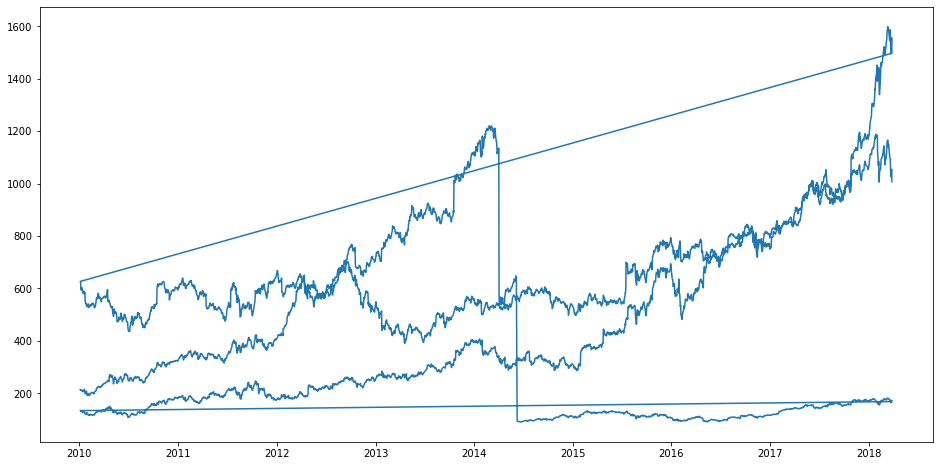

In [23]:
plt.figure(figsize=(16,8))
plt.plot(df['close'], label = 'Close Price history')